In [2]:
import glob, os, sys
import datetime as dt
from matplotlib.dates import date2num, num2date
from calendar import monthrange
import h5py
import matplotlib.pylab as plt
# from modest_image import imshow
# import numpy as np   # already imported in zplsc_b

sys.path.append('/Users/wujung/code/mi-instrument/')
from mi.instrument.kut.ek60.ooicore.zplsc_b import *

In [3]:
%matplotlib inline

In [13]:
ff = glob.glob('/Volumes/wjlee_apl_2/ooi_zplsc_600m/OOI-D2017082*.raw')

In [14]:
ff

['/Volumes/wjlee_apl_2/ooi_zplsc_600m/OOI-D20170821-T000000.raw',
 '/Volumes/wjlee_apl_2/ooi_zplsc_600m/OOI-D20170820-T000000.raw']

In [20]:
particle_data, data_times, power_data_dict, freq, bin_size, config_header, config_transducer = \
        parse_echogram_file(ff[0])

Processing: /Volumes/wjlee_apl_2/ooi_zplsc_600m/OOI-D20170821-T000000.raw


In [113]:
# xticks
xtick_interval = 5
ping_num_per_xtick = int(np.floor(data_times.shape[0]/xtick_interval))
ping_num = range(0,(tick_num+1)*ping_num_per_tick,ping_num_per_xtick)
ping_time = [num2date(data_times[x]) for x in ping_num]
xtick_label = [x.strftime("%H:%M:%S") for x in ping_time]

In [114]:
num2date(data_times[-1])

datetime.datetime(2017, 8, 21, 0, 18, 52, 757836, tzinfo=<matplotlib.dates._UTC object at 0x10ab5cc10>)

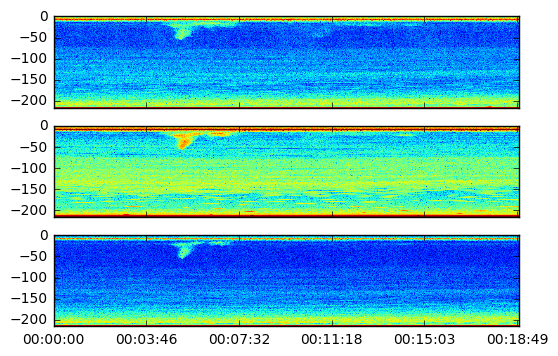

In [137]:
fig,ax = plt.subplots(3,sharex=True)
for iSub in range(3):
#    ax[iSub].plot(np.random.normal(0,1,100))
    ax[iSub].imshow(power_data_dict[iSub+1][-1:None:-1,:],aspect='auto',\
           extent=[0,power_data_dict[iSub+1].shape[1],-bin_size*power_data_dict[iSub+1].shape[1],0],\
           vmin=-160, vmax=-60)
ax[2].set_xticks(ping_num)
ax[2].set_xticklabels(xtick_label)

(array([  1.06000000e+02,   1.77670000e+04,   6.26989000e+05,
          4.21578000e+05,   1.04968000e+05,   2.57100000e+04,
          7.52500000e+03,   0.00000000e+00,   2.00000000e+00,
          5.64300000e+03]),
 array([-193.91740853, -172.73477439, -151.55214024, -130.36950609,
        -109.18687194,  -88.00423779,  -66.82160365,  -45.6389695 ,
         -24.45633535,   -3.2737012 ,   17.90893295]),
 <a list of 10 Patch objects>)

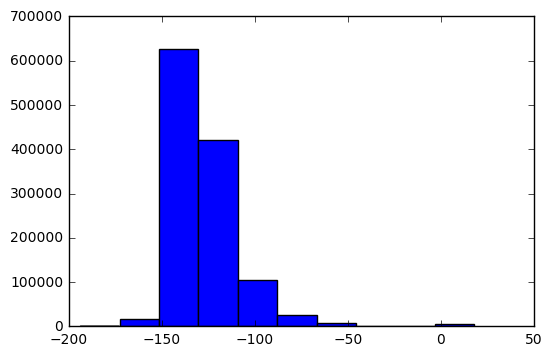

In [129]:
plt.hist(np.reshape(power_data_dict[1],-1))

In [138]:
np.version.version

'1.11.3'

In [140]:
-1%3

2